# Titanic Data Analysis

## 1. Importing the data

In [87]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline


In [108]:
# Reading data in python
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [89]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2. Exploring data

In [90]:
# What columns does the data have?
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [91]:
# What size does the data have?
train.shape

(891, 12)

In [92]:
# Are there null values in the data?
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [93]:
# How the numerical variables behave
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [94]:
# How the categorical variables behave
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


## 2.1 EDA: Target Variable Study

In [95]:
train.groupby(['Survived']).count()['PassengerId']

Survived
0    549
1    342
Name: PassengerId, dtype: int64

In [96]:
# Target vs Sex
train.groupby(['Survived', 'Sex']).count()['PassengerId']

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: PassengerId, dtype: int64

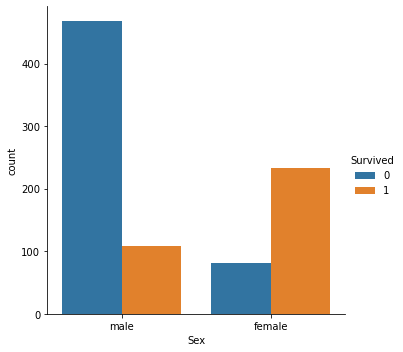

In [97]:
sns.catplot(
    data=train, kind="count",
    x="Sex", hue="Survived")

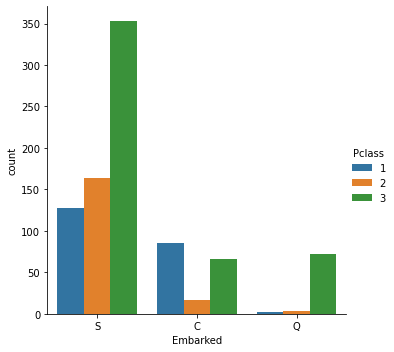

In [98]:
# Embarked vs Pclass
sns.catplot(
    data=train, kind="count",
    x="Embarked", hue="Pclass")

## 3. Data Processing
We select the variables with wich we want to work, wich would be:
* Survived
* Sex
* Age
* SibSp
* Parch

In [99]:
train[['Survived', 'Sex', 'Age', 'SibSp', 'Parch']].head()

,Survived,Sex,Age,SibSp,Parch
0,0,male,22.0,1,0
1,1,female,38.0,1,0
2,1,female,26.0,0,0
3,1,female,35.0,1,0
4,0,male,35.0,0,0


We study the null data

In [100]:
train[['Survived', 'Sex', 'Age', 'SibSp', 'Parch']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 34.9+ KB


In [101]:
# Look at how the null data is distribuyed in the age column
(train[train['Age'].isna()]
    .groupby(['Sex', 'Pclass'])
    .count()['PassengerId']
    .unstack(level=0))

Sex,female,male
Pclass,,
1,9,21
2,2,9
3,42,94


In [102]:
(train[train['Age'].isna()]
    .groupby(['SibSp', 'Parch'])
    .count()['PassengerId']
    .unstack(level=0))

SibSp,0,1,2,3,8
Parch,,,,,
0,133.0,21.0,3.0,NaN,NaN
1,1.0,3.0,NaN,4.0,NaN
2,3.0,2.0,NaN,NaN,7.0


In [119]:
# we impute the value to fill the null data 
train['Age'].median()

28.0

In [120]:
train['Age'] = train['Age'].fillna(28.0)
train[['Survived', 'Sex', 'Age', 'SibSp', 'Parch']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Sex       891 non-null    int32  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
dtypes: float64(1), int32(1), int64(3)
memory usage: 31.4 KB


Now we dont have null data we resolve the Sex column to turn it into int

In [109]:
# we use map function to label encoding
train['Sex'] = train['Sex'].map({'female': 1, 'male': 0}).astype(int)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


Now we have the processed table ready

In [110]:
train[['Survived', 'Sex', 'Age', 'SibSp', 'Parch']].head()

,Survived,Sex,Age,SibSp,Parch
0,0,0,22.0,1,0
1,1,1,38.0,1,0
2,1,1,26.0,0,0
3,1,1,35.0,1,0
4,0,0,35.0,0,0


## 3.1 Creating new variables

In [111]:
# We create a new categorical variable "alone"
train['Alone'] = np.where(
    (train['SibSp'] == 0) & (train['Parch'] == 0), 1, 0)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Alone
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,1


Survived  Alone
0         0        175
          1        374
1         0        179
          1        163
Name: PassengerId, dtype: int64


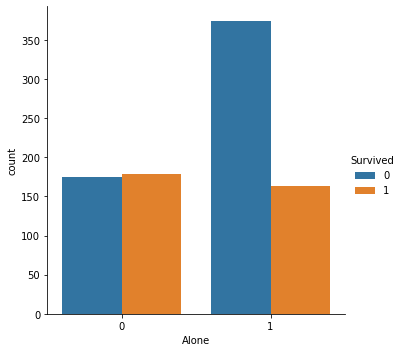

In [112]:
grouped_alone = train.groupby(['Survived', 'Alone']).count()['PassengerId']
print(grouped_alone)
sns.catplot(
    data=train, kind="count",
    x="Alone", hue="Survived")

In [114]:
train_columns = ["Survived", "Sex", "Age", "Pclass", "Alone"]
train[train_columns].head()

,Survived,Sex,Age,Pclass,Alone
0,0,0,22.0,3,0
1,1,1,38.0,1,0
2,1,1,26.0,3,1
3,1,1,35.0,1,0
4,0,0,35.0,3,1


These would already be the data with which we're going to make models

In [121]:
# Dependent variable
Y_train = train["Survived"]

# Preprocessing independent variables
features = ["Sex", "Age", "Pclass", "Alone"]
X_train = train[features]

X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sex     891 non-null    int32  
 1   Age     891 non-null    float64
 2   Pclass  891 non-null    int64  
 3   Alone   891 non-null    int32  
dtypes: float64(1), int32(2), int64(1)
memory usage: 21.0 KB


## 4.Models

We are going to choose two test models:
* Logistic Regression
* Random Forest Classifier

In [122]:
# training Logistic Regression model
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

LogisticRegression()

In [128]:
# training RandomForestRegressor model
from sklearn.ensemble import RandomForestClassifier

rancl = RandomForestClassifier()
rancl.fit(X_train, Y_train)

RandomForestClassifier()

## 5.Evaluation

We are going to make a confusion matrix and test how good each model is 

In [124]:
from sklearn.metrics import plot_confusion_matrix

def conf_mat_acc(model):
    disp = plot_confusion_matrix(model, X_train, Y_train,
                                cmap=plt.cm.Blues_r, values_format="d")
    true_pred = disp.confusion_matrix[0,0] + disp.confusion_matrix[1,1]
    total_data = np.sum(disp.confusion_matrix)
    accuracy = true_pred/total_data
    print(f'accuracy: {np.round(accuracy, 2)}')
    plt.show

accuracy: 0.79


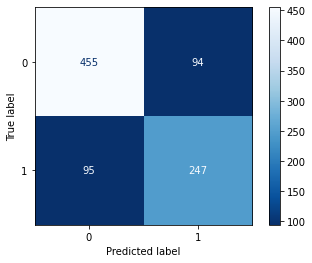

In [125]:
conf_mat_acc(logreg)

accuracy: 0.89


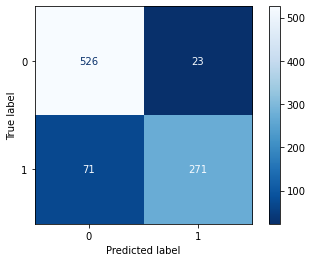

In [129]:
conf_mat_acc(rancl)

## 5.1 Evaluation on the test set

In [143]:
# We have to configure the test set for evaluation
print(test.info())
test.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int32  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Alone        418 non-null    int32  
dtypes: float64(2), int32(2), int64(4), object(4)
memory usage: 36.0+ KB
None


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Alone
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q,1


In [131]:
# Preprocessing test set

# Fill the Age column
test['Age'] = test['Age'].fillna(28.0)

# make the map function to sex
test['Sex'] = test['Sex'].map({'female': 1, 'male': 0}).astype(int)

# Create "Alone" column
test['Alone'] = np.where(
    (test['SibSp'] == 0) & (test['Parch'] == 0), 1, 0)
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Alone
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q,1
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,28.0,0,0,A.5. 3236,8.0500,NaN,S,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1
416,1308,3,"Ware, Mr. Frederick",0,28.0,0,0,359309,8.0500,NaN,S,1


In [134]:
print(test[features].info())
test[features].head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sex     418 non-null    int32  
 1   Age     418 non-null    float64
 2   Pclass  418 non-null    int64  
 3   Alone   418 non-null    int32  
dtypes: float64(1), int32(2), int64(1)
memory usage: 9.9 KB


,Sex,Age,Pclass,Alone
0,0,34.5,3,1
1,1,47.0,3,0
2,0,62.0,2,1


In [135]:
# We Split the test set
X_test = test[features]

print(X_test.shape)

(418, 4)


In [136]:
# Predicting of Survived on test set
Y_pred_log = logreg.predict(X_test)
Y_pred_ran = rancl.predict(X_test)
print(Y_pred_ran[0:10])

[0 0 1 1 0 0 0 0 1 1]


## 6. Prediccion 


In [139]:
# Predicting on test set
print(f'Logistic Regression: {Y_pred_log[0:10]}')
print(f'Random Forest Classifier: {Y_pred_ran[0:10]}')

Logistic Regression: [0 0 0 0 1 0 1 0 1 0]
Random Forest Classifier: [0 0 1 1 0 0 0 0 1 1]


In [141]:
# Downloading to the computer

def download_output(y_pred, name):
    output = pd.DataFrame({'PassengerId': test['PassengerId'],
                       'Survived': Y_pred_log})
    output.to_csv(name, index = False)

In [142]:
download_output(Y_pred_log, 'kev_pred_log.csv')
download_output(Y_pred_ran, 'kev_pred_ran.csv')